In [1]:
import harmonica as hm

In [2]:
point = (400, 300, 200)
mass = 1e6

In [3]:
coordinates = (point[0], point[1], point[2] + 100)

In [4]:
potential = hm.point_gravity(coordinates, point, mass, field="potential")
print(potential, "J/kg")

6.674299999999999e-07 J/kg


In [5]:
import numpy as np

easting = np.array([250, 750, 250, 750])
northing = np.array([250, 250, 750, 750])
upward = np.array([-100, -100, -100, -100])
points = (easting, northing, upward)

masses = np.array([1e6, -1e6, 2e6, -3e6])

In [6]:
import verde as vd

coordinates = vd.grid_coordinates(
    region=(-250, 1250, -250, 1250), shape=(40, 40), extra_coords=0
)

In [7]:
g_z = hm.point_gravity(coordinates, points, masses, field="g_z")

In [8]:
 import pygmt

 # Needed so that displaying works on jupyter-sphinx and sphinx-gallery at
 # the same time. Using PYGMT_USE_EXTERNAL_DISPLAY="false" in the Makefile
 # for sphinx-gallery to work means that fig.show won't display anything here
 # either.
 pygmt.set_display(method="notebook")

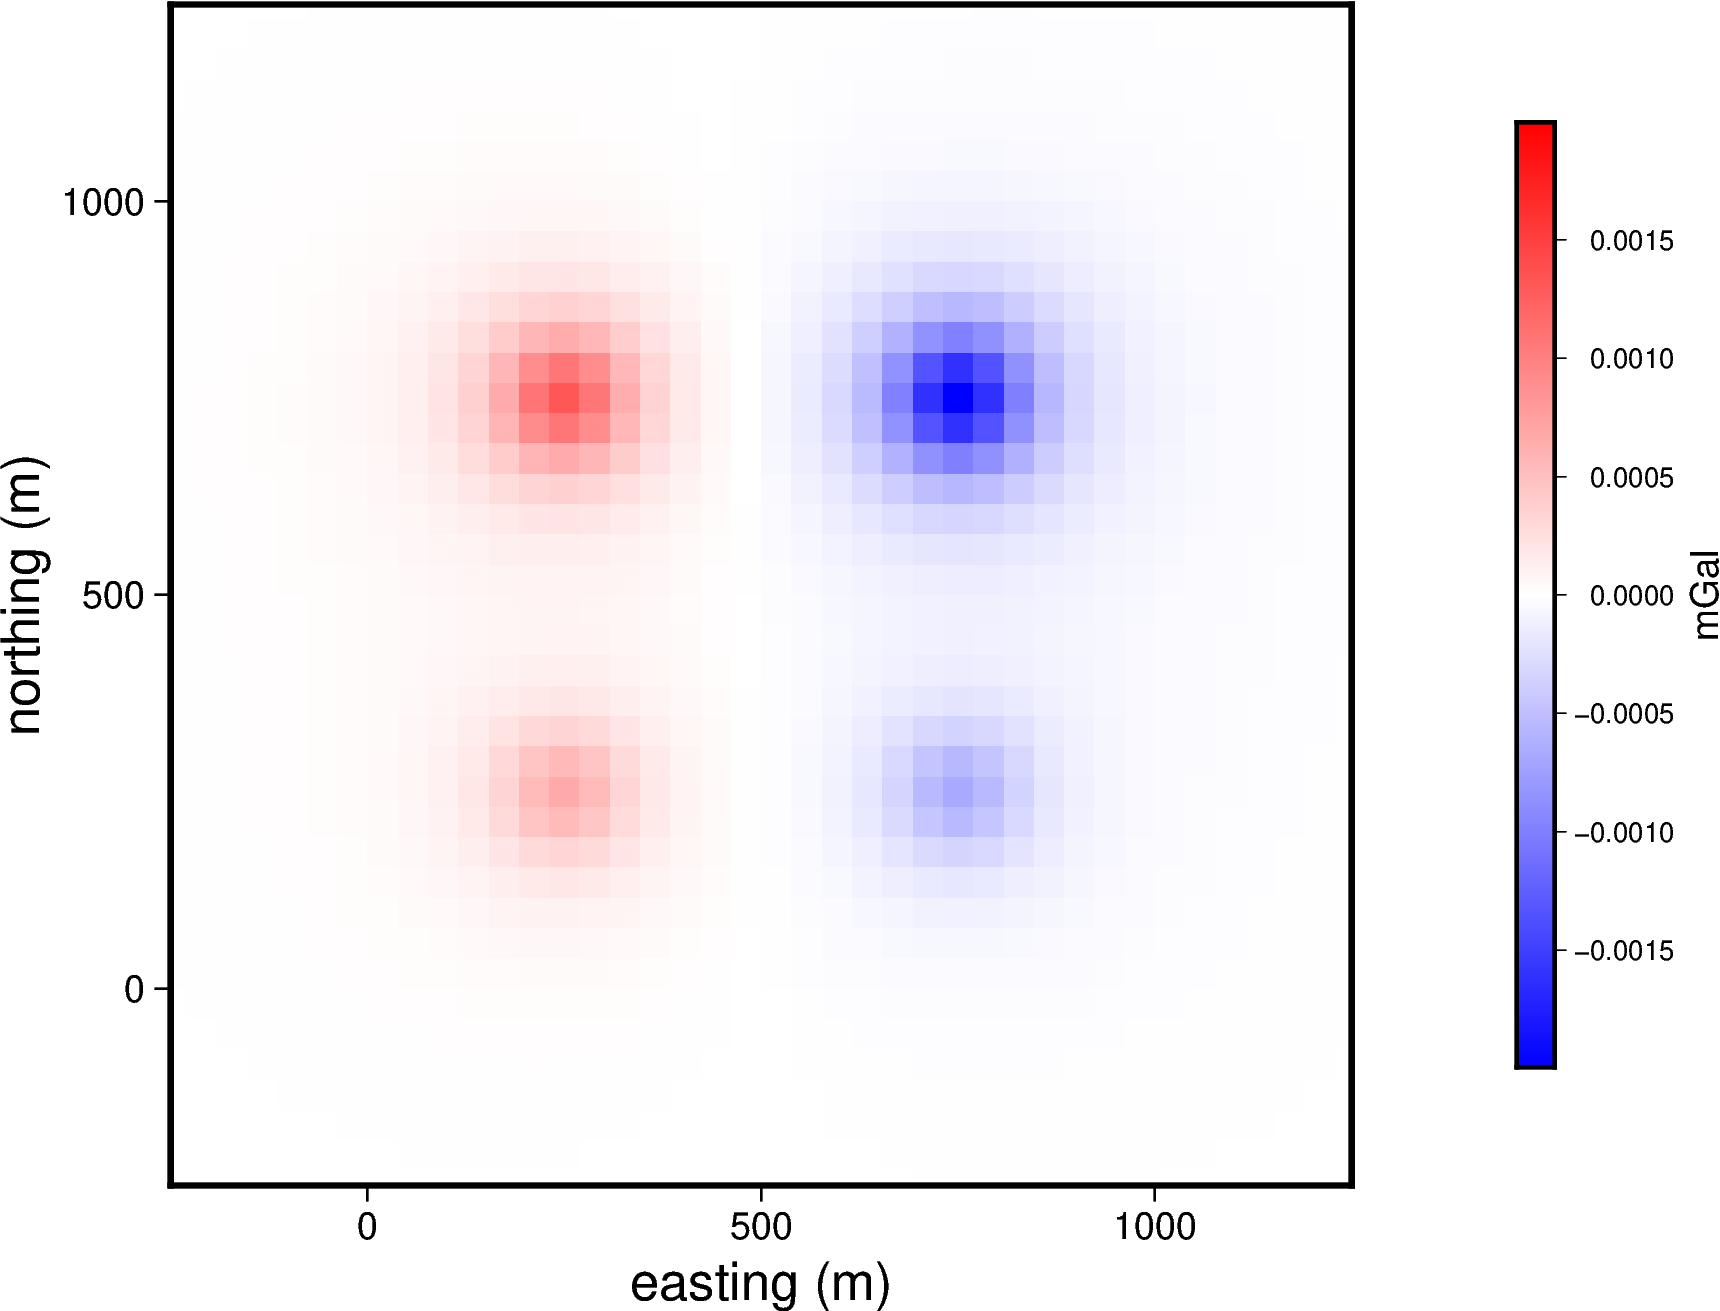

In [9]:
import pygmt

grid = vd.make_xarray_grid(
   coordinates, g_z, data_names="g_z", extra_coords_names="extra")

fig = pygmt.Figure()

maxabs = vd.maxabs(g_z)
pygmt.makecpt(cmap="polar", series=(-maxabs, maxabs), background=True)

fig.grdimage(
   region=(-250, 1250, -250, 1250),
   projection="X10c",
   grid=grid.g_z,
   frame=["a", "x+leasting (m)", "y+lnorthing (m)"],
   cmap=True,)
fig.colorbar(cmap=True, position="JMR", frame=["a.0005", "x+lmGal"])
fig.show()

In [10]:
import boule as bl

ellipsoid = bl.WGS84

In [11]:
longitude, latitude = 45, 0
radius = ellipsoid.geocentric_radius(latitude, geodetic=False)
point = (longitude, latitude, radius)

mass = 1e6

In [12]:
coordinates = (point[0], point[1], point[2] + 1000)

In [13]:
g_z = hm.point_gravity(
    coordinates, point, mass, field="g_z", coordinate_system="spherical"
)
print(g_z, "mGal")

6.6743e-06 mGal


In [14]:
longitude = np.array([-71, -71, -69, -69])
latitude = np.array([-45, -43, -45, -43])
height = np.array([-10e3, -20e3, -30e3, -20e3])
points = (longitude, latitude, height)

masses = np.array([1e6, 2e6, -3e6, 5e6])

In [15]:
coordinates = vd.grid_coordinates(
    region=(-72, -68, -46, -42),
    shape=(101, 101),
    extra_coords=20e3,
)

In [16]:
points_spherical = ellipsoid.geodetic_to_spherical(*points)
coordinates_spherical = ellipsoid.geodetic_to_spherical(*coordinates)

In [17]:
g_z = hm.point_gravity(
    coordinates_spherical,
    points_spherical,
    masses,
    field="g_z",
    coordinate_system="spherical",
)

/home/runner/miniconda3/envs/test/lib/python3.12/site-packages/pygmt/clib/session.py:1498: RuntimeWarning: Grid may have irregular spacing in the 'northing' dimension, but GMT only supports regular spacing. Calculated regular spacing 0.03998976767213982 is assumed in the 'northing' dimension.
  matrix, region, inc = dataarray_to_matrix(grid)


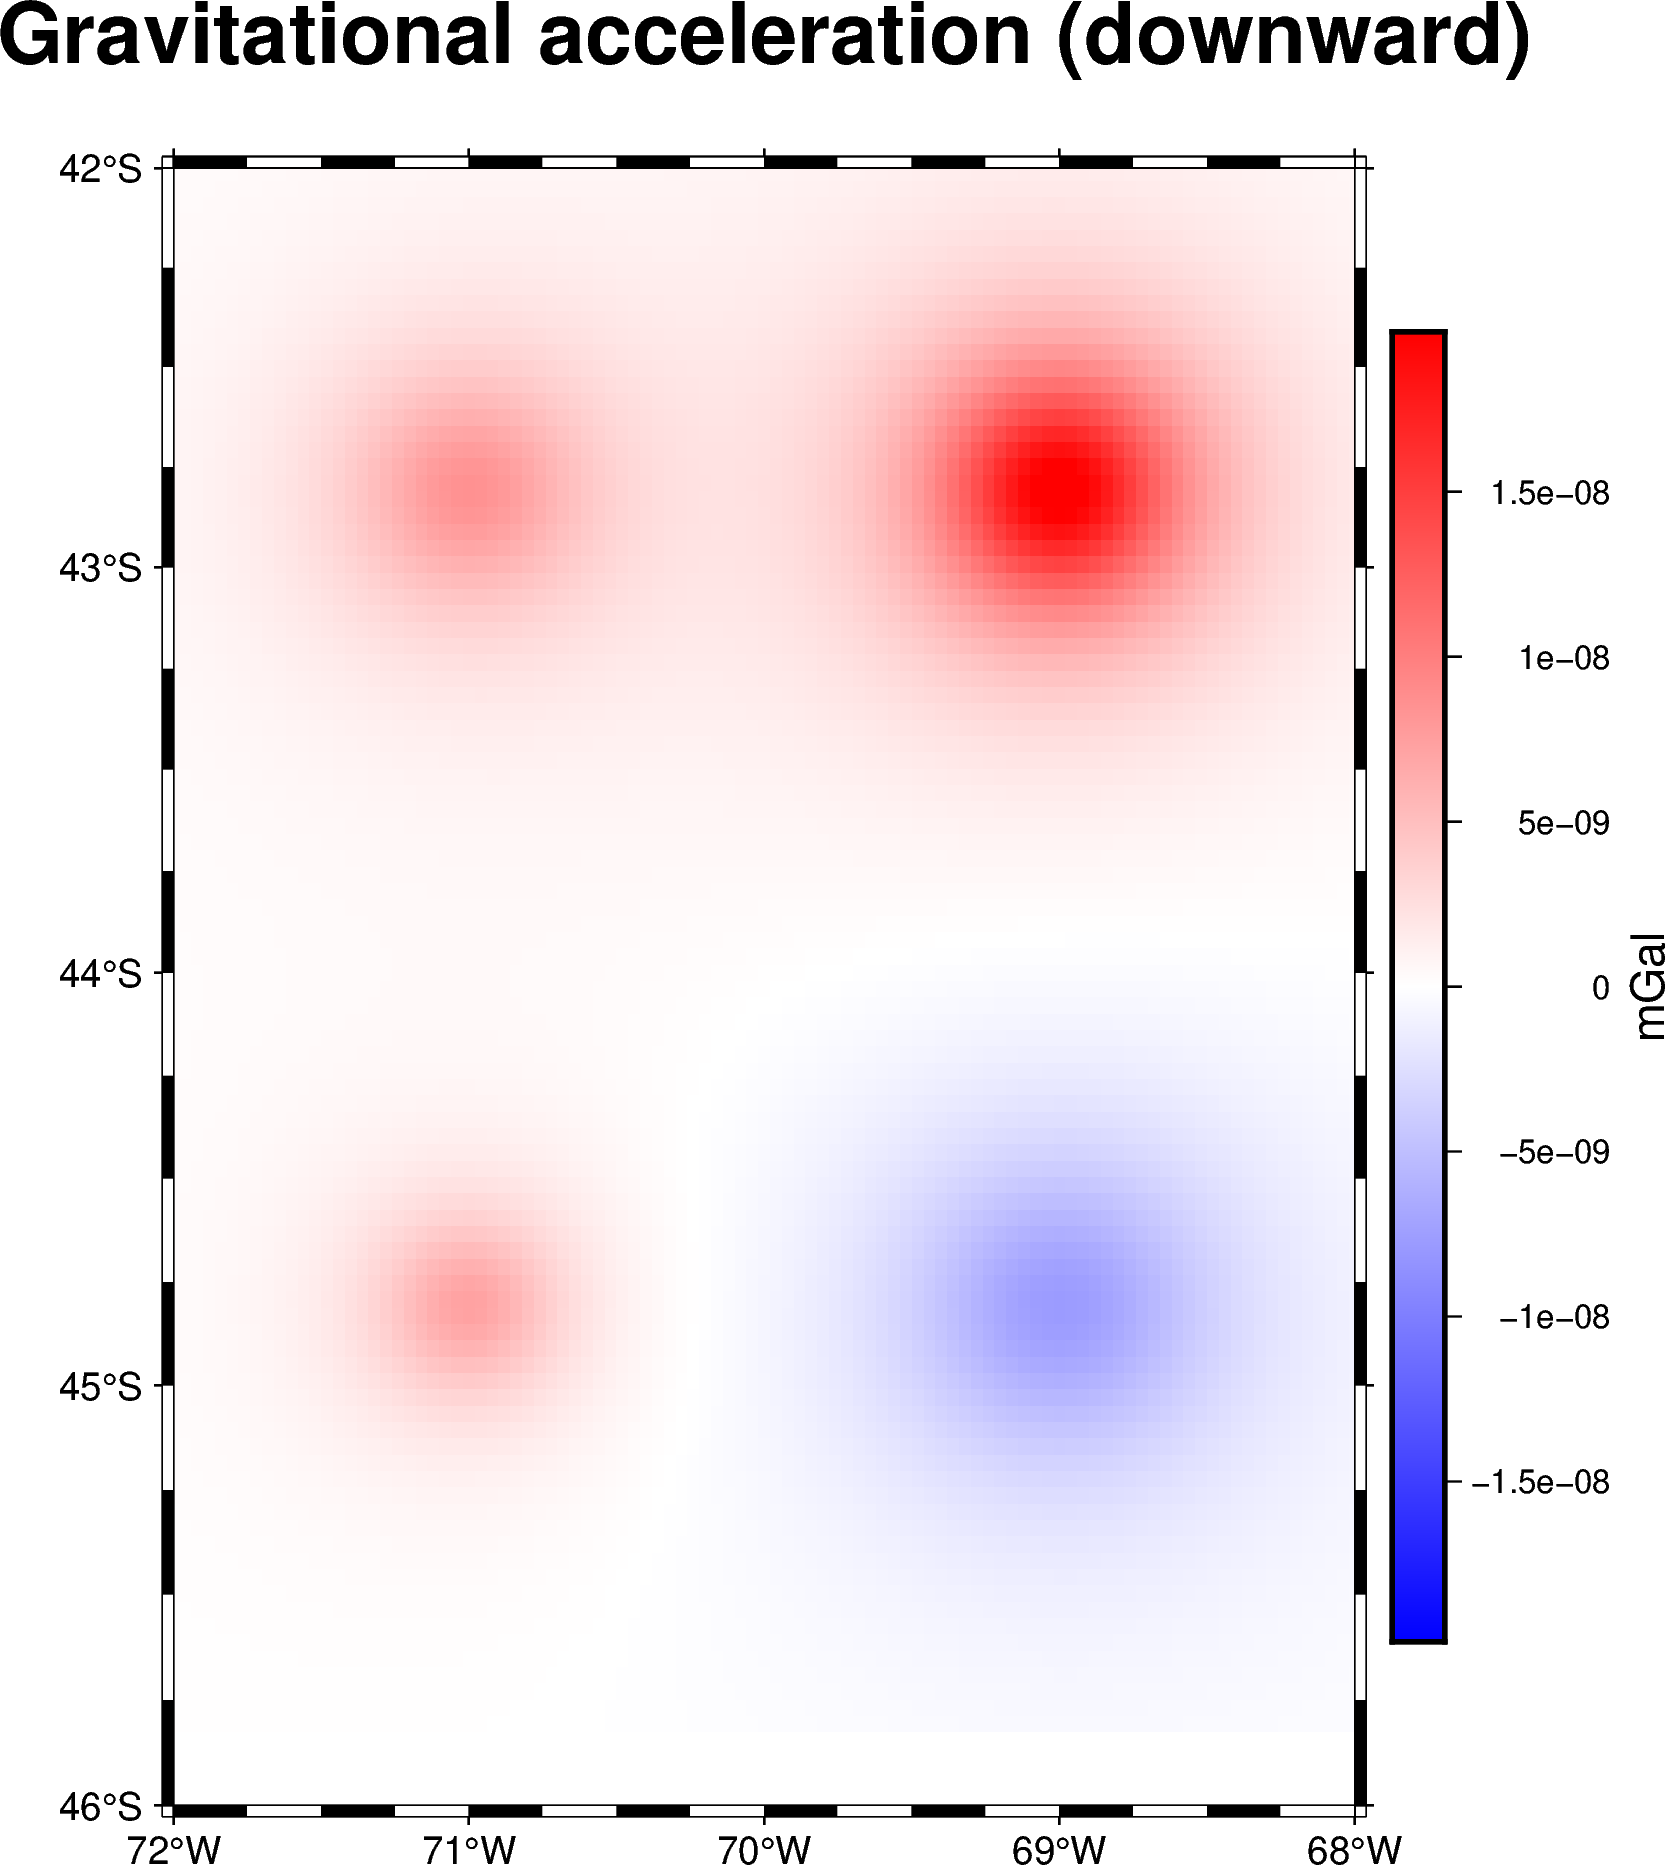

In [18]:
import pygmt

grid = vd.make_xarray_grid(
   coordinates_spherical, g_z, data_names="g_z", extra_coords_names="extra")

fig = pygmt.Figure()
title = "Gravitational acceleration (downward)"
maxabs = vd.maxabs(g_z)*.95
pygmt.makecpt(cmap="polar", series=(-maxabs, maxabs), background=True)

fig.grdimage(
   region=(-72, -68, -46, -42),
   projection="M10c",
   grid=grid.g_z,
   frame=[f"WSne+t{title}", "x", "y"],
   cmap=True,)

fig.colorbar(cmap=True, position="JMR", frame=["a0.000000005", "x+lmGal"])
fig.show()